In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from einops import rearrange
import requests
import io
import json
from tqdm import tqdm

In [2]:
import mediapy as media

In [3]:
!ls -lt baselines

total 183552
drwxr-xr-x     7 peterwhidden  staff      224 Mar 25 01:53 mini_agent_stats
-rw-r--r--     1 peterwhidden  staff       51 Mar 25 01:45 requirements.txt
drwxr-xr-x     4 peterwhidden  staff      128 Mar 17 01:48 session_85bd73ef
drwxr-xr-x     3 peterwhidden  staff       96 Mar 16 23:50 session_31f4668a
drwxr-xr-x     3 peterwhidden  staff       96 Mar 16 23:49 session_0ffd2753
drwxr-xr-x     4 peterwhidden  staff      128 Mar 14 18:07 session_34fd89b2
drwxr-xr-x     4 peterwhidden  staff      128 Mar 14 18:00 session_a7835aa4
drwxr-xr-x     4 peterwhidden  staff      128 Mar  8 16:46 session_00625678
-rw-r--r--     1 peterwhidden  staff     3004 Mar  8 16:42 run_baseline_parallel.py
drwxr-xr-x     3 peterwhidden  staff       96 Mar  8 16:39 session_9aab4903
drwxr-xr-x     9 peterwhidden  staff      288 Feb 19 12:20 session_4ba3e68a
drwxr-xr-x     3 peterwhidden  staff       96 Feb 19 11:46 __pycache__
-rw-r--r--     1 peterwhidden  staff    20048 Feb 19 11:46 red_gym_env.p

In [4]:
run_dir = Path('baselines/mini_agent_stats') # Path('baselines/session_ebdfe818')
# original session_e41c9eff, main session_4da05e87, extra session_e1b6d2dc

In [5]:
dfs = []
for run in tqdm(run_dir.glob('*.gz')):
    dfs.append(pd.read_csv(run, compression='gzip'))

5it [01:15, 15.19s/it]


In [6]:
dfs[0].keys()

Index(['Unnamed: 0', 'step', 'x', 'y', 'map', 'pcount', 'levels', 'ptypes',
       'hp', 'frames', 'deaths', 'badge', 'event', 'healr'],
      dtype='object')

In [15]:
#dfs[0][dfs[0]['x'] == 'x']

In [9]:
def filter_dfs(dfs):
    return [
        tdf[tdf['map'] != 'map']
        for tdf in dfs
    ]

In [10]:
def make_all_coords_arrays(filtered_dfs):
    return np.stack([tdf[['x', 'y', 'map']].to_numpy().astype(np.uint8) for tdf in filtered_dfs]).transpose(1,0,2)

In [11]:
base_coords = make_all_coords_arrays(filter_dfs(dfs)) #level_z[['x', 'y', 'map']].to_numpy().astype(np.uint8)
base_coords.shape

(9994850, 5, 3)

In [13]:
del dfs

In [14]:
# check for pokemon being deposited in pc by levels going down
'''
#sdf = pd.read_csv(next(run_dir.glob('*.gz')), compression='gzip')
#test_levels = np.stack([arr for arr in sdf['levels'].to_numpy()])
#levels = np.stack(filter_dfs([sdf])[0]['levels'].map(json.loads).map(np.array))
#all_levels = np.stack([tdf[['levels']].to_numpy() for tdf in filter_dfs(dfs)])
for run in tqdm(run_dir.glob('*.gz')):
    levels = np.stack(filter_dfs([pd.read_csv(run, compression='gzip')])[0]['levels'].map(json.loads).map(np.array))
    sums = levels.sum(1)-6
    for i in range(len(sums)-1):
        cur = sums[i]
        nx = sums[i+1]
        if nx < cur and nx != 0:
            print(run, i)
            print(f'cur: {levels[i]}')
            print(f'nx : {levels[i+1]}')
'''

"\n#sdf = pd.read_csv(next(run_dir.glob('*.gz')), compression='gzip')\n#test_levels = np.stack([arr for arr in sdf['levels'].to_numpy()])\n#levels = np.stack(filter_dfs([sdf])[0]['levels'].map(json.loads).map(np.array))\n#all_levels = np.stack([tdf[['levels']].to_numpy() for tdf in filter_dfs(dfs)])\nfor run in tqdm(run_dir.glob('*.gz')):\n    levels = np.stack(filter_dfs([pd.read_csv(run, compression='gzip')])[0]['levels'].map(json.loads).map(np.array))\n    sums = levels.sum(1)-6\n    for i in range(len(sums)-1):\n        cur = sums[i]\n        nx = sums[i+1]\n        if nx < cur and nx != 0:\n            print(run, i)\n            print(f'cur: {levels[i]}')\n            print(f'nx : {levels[i+1]}')\n"

In [15]:
#level_z = sdf[(sdf['map'] == '0') | (sdf['map'] == '12') | (sdf['map'] == '1')] # sdf[(sdf['map'] == '1')] #

In [16]:
sprites = {
    'characters': 'https://www.spriters-resource.com/resources/sheets/8/8728.png',
    0: 'https://www.spriters-resource.com/resources/sheets/52/55181.png'
}

In [18]:
main_map = np.array(Image.open('temp/RoughMap.png'))

In [19]:
def load_tex(name):
    resp = requests.get(sprites[name])
    return np.array(Image.open(io.BytesIO(resp.content)))

In [20]:
def get_sprite_by_coords(img, x, y):
    sy = 34+17*y
    sx = 9 +17*x
    alpha_val = np.array([255, 127,  39, 255], dtype=np.uint8)
    sprite = img[sy:sy+16, sx:sx+16]
    return np.where((sprite == alpha_val).all(axis=2).reshape(16,16,1), np.array([[[0,0,0,0]]]), sprite).astype(np.uint8)


In [21]:
chars_img = load_tex('characters')

In [22]:
alpha_val = get_sprite_by_coords(chars_img, 1, 0)[0,0]
alpha_val

array([0, 0, 0, 0], dtype=uint8)

In [23]:
walks = [get_sprite_by_coords(chars_img, x, 0) for x in [1, 4, 6, 8]]

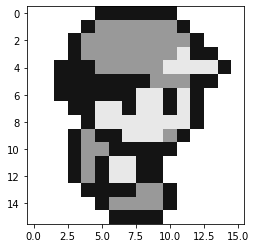

In [24]:
plt.imshow(walks[3])

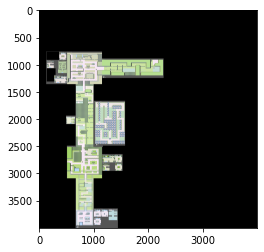

In [25]:
plt.imshow(main_map)

In [116]:
def add_sprite(overlay_map, sprite, x, y, map_idx, opacity=1.0, add=True):
    global_offset = np.array([1062-16*24, 338]) #np.array([790, -29])
    map_offsets = {
        # https://bulbapedia.bulbagarden.net/wiki/List_of_locations_by_index_number_(Generation_I)
        0: np.array([0,0]), # pallet town
        1: np.array([-10, 72]), # viridian
        2: np.array([-10, 180]), # pewter
        12: np.array([0, 36]), # route 1
        13: np.array([0, 144]), # route 2
        37: np.array([9+12, 150-150]), # red house first
        38: np.array([16+12, 150-150]), # red house second
        39: np.array([9+12, 140-150]), # blues house
        40: np.array([25+12, 150-150]), # oaks lab
        51: np.array([22, 123]) # viridian forest
    }
    if map_idx in map_offsets.keys():
        offset = map_offsets[map_idx]
    else:
        offset = np.array([0,0])
        x, y = 0, 0
    coord = global_offset + 16*(offset + np.array([x,y]))
    coord[1] = overlay_map.shape[0] - coord[1]
    base = (overlay_map[coord[1]:coord[1]+16, coord[0]:coord[0]+16, :]).astype(np.float32)
    new = opacity*sprite.astype(np.float32)
    if add:
        intermediate = base + new
    else:
        intermediate = new
    overlay_map[coord[1]:coord[1]+16, coord[0]:coord[0]+16, :] = intermediate.clip(0, 255).astype(np.uint8)

In [117]:
def blend_overlay(background, over):
    al = over[...,3].reshape(over.shape[0], over.shape[1], 1)
    ba = (255-al)/255
    oa = al/255
    return (background[..., :3]*ba + over[..., :3]*oa).astype(np.uint8)

In [118]:
#sdf.head(50)
base_coords[0, :20]

array([[ 5,  3, 40],
       [ 5,  3, 40],
       [ 5,  3, 40],
       [ 5,  3, 40],
       [ 5,  3, 40]], dtype=uint8)

In [119]:
def render_coords(coords, over):
    for x,y,mp in coords:
        add_sprite(over, walks[0], int(x), -int(y), mp, add=False)

In [120]:
start = main_map.copy()
overlay = np.zeros_like(start, dtype=np.uint8)

In [121]:
#add_sprite(overlay, walks[0], -12, -11, 0)
render_coords(base_coords[:39500, 0], overlay)

In [122]:
def split(img):
    return rearrange(img, '(s y) x c -> y (s x) c', s=2)

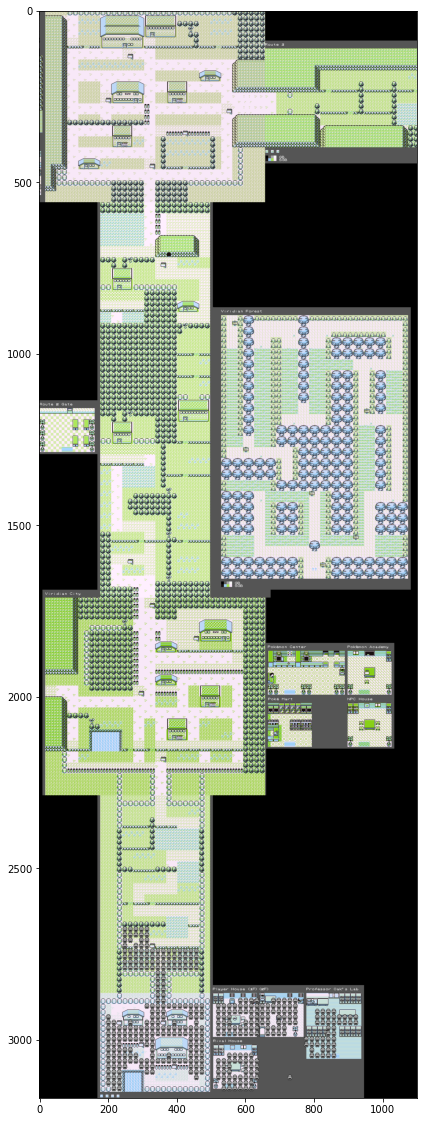

In [123]:
plt.figure(figsize = (20,20))
plt.imshow((blend_overlay(start, overlay)[800:3970, 500:1600]))

In [48]:
overlay.shape

(4000, 4000, 4)

In [49]:
def render_video(all_coords, bg):
    over = np.zeros_like(bg, dtype=np.uint8)
    with media.VideoWriter('test_out_short.mp4', split(bg[800:3970, 500:1600]).shape[:2], fps=60) as wr:
        for idx, step in tqdm(enumerate(all_coords)):
            if idx % 2 == 0:
                over[over > 0] -= 1
            for x,y,mp in step:
                add_sprite(over, walks[0], int(x), -int(y), mp)
            if idx % 10 == 0:
                wr.add_image(split(blend_overlay(bg[800:3970, 500:1600], over[800:3970, 500:1600])))

In [124]:
render_video(base_coords[0:1500], start)

1500it [00:54, 27.39it/s]


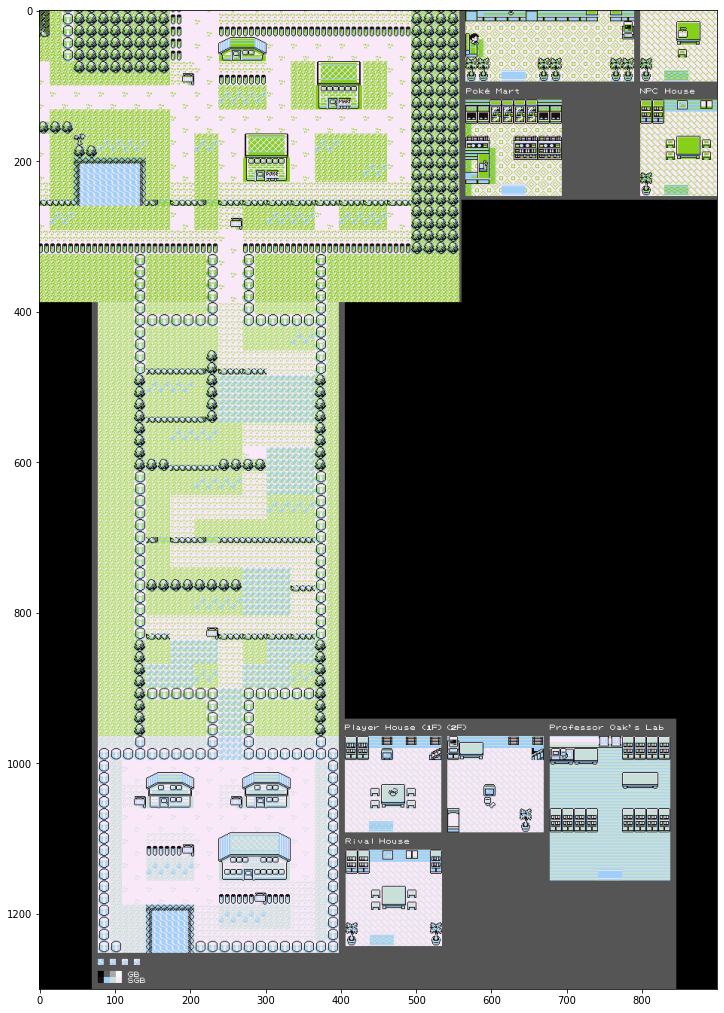

In [909]:
plt.figure(figsize = (18,18))
plt.imshow(start[2700:, 600:1500])

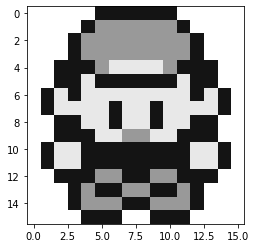

In [651]:
plt.imshow(walks[0])